<a href="https://colab.research.google.com/github/sairamadithya/fashion_mnist/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEPS FOLLOWED IN THIS NOTEBOOK
1. IMPORTING ESSENTIAL LIBRARIES

2. DATA SPLITTING AND TRANSFORMING

3. MODEL CREATION

4. MODEL COMPILATION

5. MODEL TRAINING

6. MODEL EVALUATION

7. MODEL PREDICTION

# IMPORTING ESSENTIAL LIBRARIES

i am using the tensorflow keras library to build,train and test the model. 
also the cifar-10 dataset is present in the keras library

FASHION MNIST

fashion mnist is like that of the mnist but contains images of dresses instead of  of images of 10 dress classes which are arranged alphabetically. they are 

'T-shirt/top'

'Trouser'

'Pullover'

'Dress'

'Coat'

'Sandal'

'Shirt'

'Sneaker'

'Bag'

'Ankle boot']

this dataset contains about 60000 images of the size 28*28 and are grayscale images and is a very good dataset for starters


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from keras.layers import *
from keras.preprocessing import image
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# DATA SPILTTING AND TRANSFORMING

since there are 60000 images as a whole we have to split them into training and testing. 

x- images y-classes (labels)

all colours in the universe have values in the range of (0,255) where white is 0 and black is 255.

we apply a trnsformaton to the training and testing images x so as to convert the range of (0,255) to (0,1)

since the y contains labels it cannot be used by the model.so it is essential to convert them into vectors by using the to_categorical

In [2]:
(xtrain,ytrain),(xtest,ytest)= tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train= xtrain/255.0
x_test= xtest/255.0
x_train = np.expand_dims(x_train, -1) #done for grayscale images to remove one dimension
x_test = np.expand_dims(x_test, -1) 
y_train= to_categorical(ytrain, 10) #to convert class vectors into categorical vectors
y_test= to_categorical(ytest, 10)

In [4]:
x_train.shape

(60000, 28, 28, 1)

#MODEL CREATION

the sequential of the keras is used to create a blank/empty model upon which the layers are stacked upon

the convolutional neural network consists of the three layers namely the convolution, pooling and dense

convolution= they scan the image in which the filters slide onto the input image and perform mathematical operations. they extract features from the image

pooling= these layers are used to perform some mathematial computations and also reduce the parameters

dense- these layers do the classification process. these layers are similar to those in the ANN (artificial neural network)

the dropout layer is used to reduce overfitting (the deviation of testing curves from the training). this cuts off some of the connections in between layers. this is one of the stratergies adopted to prevent overfitting

the gaussian noise is also used to prevent overfitting. adding noises to the input is an efficient technique to prevent overfitting

In [5]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.15))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        3

# MODEL COMPILATION

the loss or error is defined as the difference between the actual and predicted outputs. an ideal model is the one which has zero loss. the function of the optimiser is to find the optimum values of parameters so that the loss is minimum. it does it by finding the gradient of the parameter with the output and updating the values based on the gradient. the metrics parameter can be used to track the efficieny of the model

the optimiser used here is adam and the loss function is crossentropy. the metrics used is accuracy

In [6]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

# MODEL TRAINING

here i have used two callbacks namely the modelcheckpoint and the earlystopping

the modelcheckpoint is used to save the model with the best weights so that we need not train the model but we can load the model

the earlystopping is used to halt the training process so as to find the ideal number of epochs. this is one of the stratergies to prevent overfitting

the formula to be followed while training a model:-

(steps_per_epoch)*(batch size)= number of training images

there are 50000 training images, so a batch size of 32 requires 1875 steps_per_epoch

In [7]:

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
mp= ModelCheckpoint('mymodel.hdf5',save_best_only=True)
es= EarlyStopping(monitor='val_loss',patience=5)
callbacks= [mp,es]
history= model.fit(
         x_train,
         y_train,
         steps_per_epoch=1875,
         epochs=10,
         batch_size=32,
         validation_data= (x_test,y_test),
         callbacks=callbacks
)

Epoch 1/10
1875/1875 [==============================] - 55s 5ms/step - loss: 0.5695 - accuracy: 0.7998 - val_loss: 0.3136 - val_accuracy: 0.8856
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2874 - accuracy: 0.8960 - val_loss: 0.2822 - val_accuracy: 0.8950
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2441 - accuracy: 0.9116 - val_loss: 0.2126 - val_accuracy: 0.9220
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2191 - accuracy: 0.9209 - val_loss: 0.2005 - val_accuracy: 0.9259
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1929 - accuracy: 0.9294 - val_loss: 0.2109 - val_accuracy: 0.9234
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1840 - accuracy: 0.9334 - val_loss: 0.2028 - val_accuracy: 0.9264
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1717 - accuracy: 0.9357 - val_loss: 0.1966 - val_accuracy

# MODEL EVALUATION

In [8]:
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0881 - accuracy: 0.9672


[0.0880771204829216, 0.967199981212616]

In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2038 - accuracy: 0.9323


[0.20379504561424255, 0.9322999715805054]

THE MODEL HAS PRODUCED THE FOLLOWING


TRAINING LOSS- 0.088

TRAINING ACCURACY- 96.7%

VALIDATION LOSS- 0.203

VALIDATION ACCURACY- 93.2%

#LOSS AND ACCURACY PLOTS OF THE MODEL

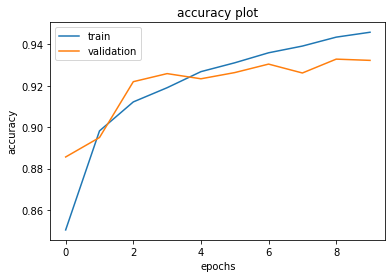

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy plot')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','validation'])


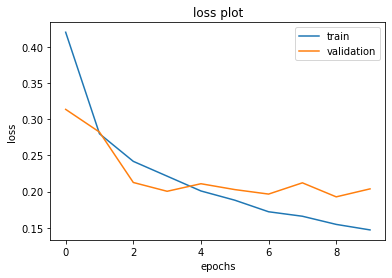

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss plot')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','validation'])

#MODEL PREDICTION

this is a simple code used to check one sample from the testing data.

this code displays the prediction of the model and the truth and based on their relationship, it gives a statement about the model

In [26]:

ypred= model.predict(x_test)
pred=np.argmax(ypred[0])
truth=np.argmax(y_test[0])
if pred==truth:
  print("the predicted class is",pred)
  print("the true class is",truth)
  print("Hence the model is working properly")
else:
  print("the predicted class is",pred)
  print("the true class is",truth)
  print("there is an error in the model")    


the predicted class is 9
the true class is 9
Hence the model is working properly


this method allows us to take images from outside source and then use them for prediction.

I will be providing some images for testing along with their real class to evaluate the model

or you can try searching for "grayscale images for fashion mnist" in google and obtain the testing images



PROJECT TESTING
The uploaded image is classified as:Trouser
THANK YOU FOR USING THIS PROJECT. HOPE THIS HELPS!!!!


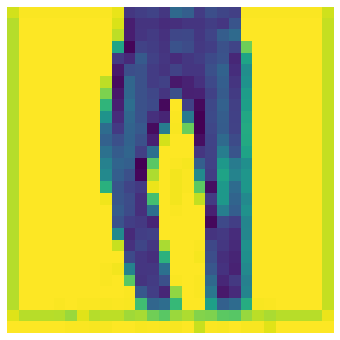

In [43]:
print('PROJECT TESTING')
from keras.preprocessing import image
img = image.load_img('images (3).jpeg',color_mode = "grayscale",target_size=(28,28))
imag = image.img_to_array(img)
imag = imag.reshape(1, 28, 28, 1)
image = imag.astype('float32')
image = image / 255.0
ypred = model.predict(image)
output=np.argmax(ypred)
if output==0: 
    y='T-shirt/top' 
elif output==1: 
    y='Trouser'
elif output==2: 
    y='Pullover' 
elif output==3: 
    y='Dress' 
elif output==4: 
    y='Coat' 
elif output==5: 
    y='Sandal' 
elif output==6: 
    y='Shirt' 
elif output==7: 
    y='Sneaker' 
elif output==8: 
    y='Bag' 
elif output==9: 
    y='Ankle Boot'
def plot_img(img):
  plt.figure(figsize=(6,6))
  plt.imshow(img)  
  plt.title('')
  plt.axis('off')
plot_img(img)
print('The uploaded image is classified as:'+str(y))
print('THANK YOU FOR USING THIS PROJECT. HOPE THIS HELPS!!!!')